<a href="https://colab.research.google.com/github/rahultejagorantala/Machine_Learning/blob/main/Spaceship_Titanic_kaggle/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#split passnegerid into two features.
# need to predict homeplanet variable.


In [ ]:
import pandas as pd
import os
TRAIN_PATH = os.path.join('/home' + os.sep, 'linpeng', 'Downloads', 'new','train.csv')
TEST_PATH  = os.path.join('/home' + os.sep, 'linpeng', 'Downloads', 'new','test.csv')
def load_data(path = TRAIN_PATH):
   return pd.read_csv(path)
TRAIN_PATH

'/home/linpeng/Downloads/new/train.csv'

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
train_data = load_data(TRAIN_PATH)

In [ ]:
test_data = load_data(TEST_PATH)

In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
#import io
#train_data = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [ ]:
#test_data = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [ ]:
train_data.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [ ]:
test_data.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
train_data.isnull().values.any()

True

In [ ]:
train_data["HomePlanet"].isnull().values.sum()

201

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


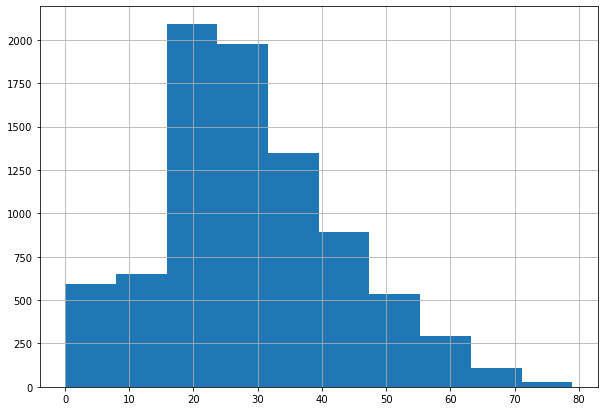

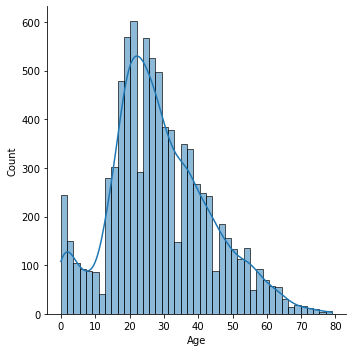

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train_data['Age'].hist(figsize=(10,7), bins=10)
sns.displot(train_data['Age'],kde = True)

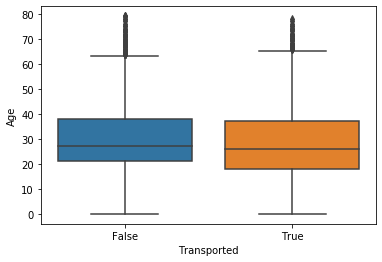

In [ ]:
sns.boxplot(x='Transported', y='Age', data = train_data)

In [ ]:
train_data.describe(include = 'all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0853_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Asch Stradick,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9bbda7490>,
      dtype=object)

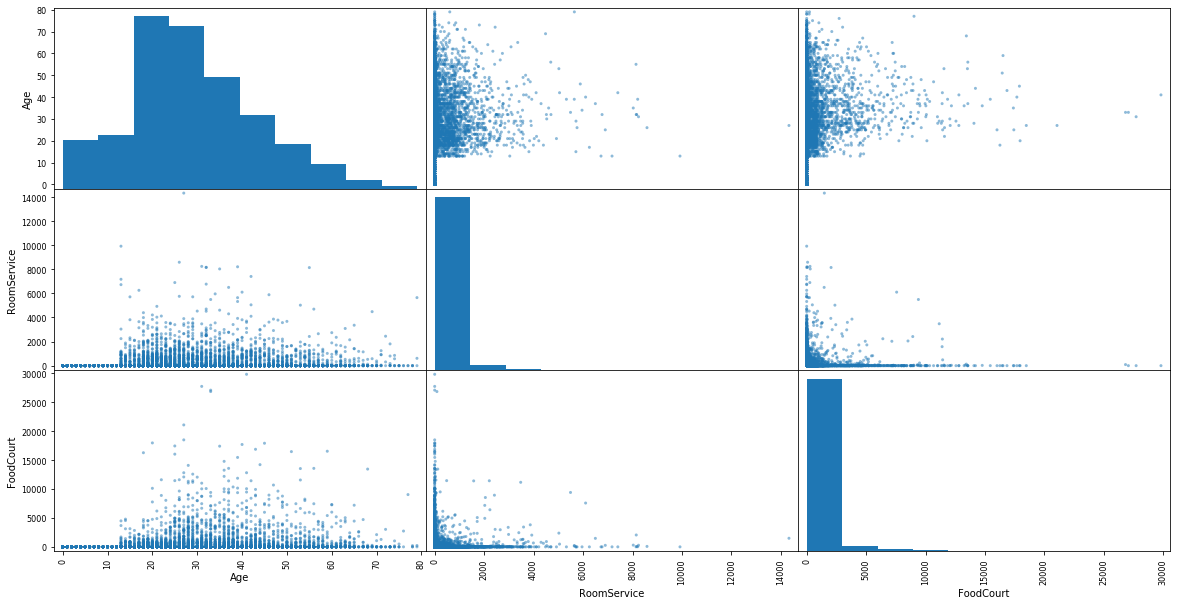

In [ ]:

from pandas.plotting import scatter_matrix
attributes = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "Age", "VIP", "RoomService", "FoodCourt"]
scatter_matrix(train_data[attributes], figsize = (20,10))

In [ ]:
corr = train_data.corr()
corr

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


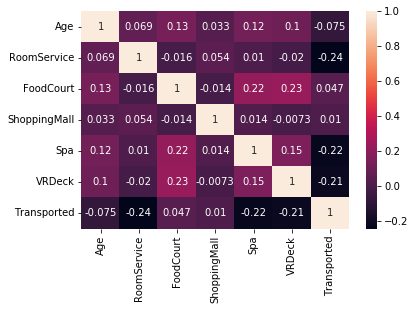

In [ ]:

sns.heatmap(corr, annot=True)

In [ ]:
#finding missing values
total = train_data.isnull().sum().sort_values(ascending = False)
percentage = train_data.isnull().sum()/train_data.isnull().count()*100
percentage1 = percentage.sort_values(ascending = False)
missing_values = pd.concat([total, percentage1], axis = 1, keys = ['Total', 'Percentage'])
missing_values

,Total,Percentage
CryoSleep,217,2.496261
ShoppingMall,208,2.392730
VIP,203,2.335212
HomePlanet,201,2.312205
Name,200,2.300702
Cabin,199,2.289198
VRDeck,188,2.162660
Spa,183,2.105142
FoodCourt,183,2.105142
Destination,182,2.093639


In [ ]:
#correlation matrix cannot be used to understand continuous and categorical data, so this corr() is not needed.

In [ ]:
pd.crosstab(train_data['HomePlanet'],train_data['Transported'] )

Transported,False,True
HomePlanet,,
Earth,2651,1951
Europa,727,1404
Mars,839,920


In [ ]:
train_data['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [ ]:
a = [58,72,74,92,84,40,74,81,76,83]

from statistics import median
a.sort()
print(a)
median(a)

[40, 58, 72, 74, 74, 76, 81, 83, 84, 92]


75.0

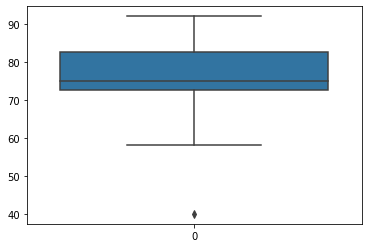

In [ ]:
sns.boxplot(data = a)

In [ ]:
#crosstab is used to Analyse categorical data.
#by above we can say that Europa people have more chance of getting transported.

In [ ]:
#finding the null for each feature.
test_data.isnull().values.any(), train_data.isnull().values.any()

(True, True)

In [ ]:
# In a benchmark, concatenating multiple dataframes by using the Pandas. concat function is 50 times faster than using the DataFrame.
def find_null_count(data):
    null_values = data.isnull().sum().sort_values(ascending =False)
    percentage  = null_values/data.isnull().count().sort_values(ascending = False) 
    
    #output = pd.DataFrame(null_values, columns=['Total'])
    output = pd.concat([null_values, percentage], axis = 1, keys = ['Total','Percentage'])
    print(output)

In [ ]:
find_null_count(train_data), find_null_count(test_data)
# we an see most of the features have equal number of null values.

              Total  Percentage
CryoSleep       217    0.024963
ShoppingMall    208    0.023927
VIP             203    0.023352
HomePlanet      201    0.023122
Name            200    0.023007
Cabin           199    0.022892
VRDeck          188    0.021627
Spa             183    0.021051
FoodCourt       183    0.021051
Destination     182    0.020936
RoomService     181    0.020821
Age             179    0.020591
Transported       0    0.000000
PassengerId       0    0.000000
              Total  Percentage
FoodCourt       106    0.024784
Spa             101    0.023615
Cabin           100    0.023381
ShoppingMall     98    0.022913
Name             94    0.021978
VIP              93    0.021744
CryoSleep        93    0.021744
Destination      92    0.021510
Age              91    0.021277
HomePlanet       87    0.020341
RoomService      82    0.019172
VRDeck           80    0.018705
PassengerId       0    0.000000


(None, None)

In [ ]:
#first code the categorical variables.
train_data[train_data['HomePlanet'] == 'NaN']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


In [ ]:
data = [train_data, test_data]
mappers= {"Earth":1, "Europa":2, "Mars":3}

for dataset in data:
    dataset['HomePlanet'] = dataset['HomePlanet'].map(mappers)

In [ ]:
# we can use imputer to replace all the null values to some value like median.
from sklearn.impute import SimpleImputer   # Scikit-Learn provides a handy class to take care of missing values: SimpleImputer
imputer = SimpleImputer(strategy = "median")

In [ ]:
train_data['HomePlanet'].fillna(0, inplace=True)

In [ ]:
train_data['HomePlanet'].value_counts()

1.0    4602
2.0    2131
3.0    1759
0.0     201
Name: HomePlanet, dtype: int64

In [ ]:
#now we can use the dataset where the value is 0 as the test set.
HomePlanet_test = train_data[train_data['HomePlanet'] == 0]
HomePlanet_train = train_data[train_data['HomePlanet'] != 0]
HomePlanet_y_train = HomePlanet_train["HomePlanet"]
HomePlanet_x_train = HomePlanet_train.drop(["HomePlanet"], axis=1)
HomePlanet_x_test  = HomePlanet_train.drop(["HomePlanet"], axis=1)

In [ ]:
#but as more of them are categorial values in our case it is not good to use this.
#better way is to use a model to predict the values.

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#model.fit(HomePlanet_x_train, HomePlanet_y_train)
#model.predict(HomePlanet_x_test)

# we are getting error as the we did not convert all categorical variables. so lets move to next step.

In [ ]:
from sklearn import tree

#clf= tree.DecisionTreeClassifier()
#clf.fit(HomePlanet_x_train, HomePlanet_y_train)
#decisciontree also has same problem

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                        ('std_scalar', StandardScaler())])
#housing_num_tr = num_pipeline.fit_transform(HomePlanet_x_train)
#housing_num_tr

In [ ]:
#housing_num_tr.isnull().any().values

In [ ]:
#HomePlanet_x_train[cat_attribs].isnull().any().values

In [ ]:
#HomePlanet_x_train[cat_attribs] = HomePlanet_x_train[cat_attribs].fillna('bfill', inplace=False)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
cat_attribs = ["PassengerId", "Cabin", "CryoSleep", "Destination", "VIP", "Name", "Transported"]
# here cabin feature cannot be onehot encoded, it should be manually coded to numbers.

#full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs),
                                 #  ('cat', OneHotEncoder(), cat_attribs)
                                 # ])

#housing_prepared = full_pipeline.fit_transform(HomePlanet_x_train)
#housing_prepared
#type(housing_prepared)

In [ ]:
#model.fit(housing_prepared, HomePlanet_y_train)
#model.predict(HomePlanet_x_test)

In [ ]:
#we cant directly use transormer to covert all categorical variables to numerical to use for prediction 
#as the data has Cabin could not be encoded by onehot, we have to do it manually
#and i dont want to usesimple imputer to predict the missing values because there are categorical variables and it will not make \
#much sense to do that.
#so coding manually 

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   float64
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(7), object(6)
memory usage: 891.5+ KB


In [ ]:
#coding CryoSleep to numbers
data = [train_data, test_data]
mappers= {True:1, False:0}

for dataset in data:
    dataset['CryoSleep'] = dataset['CryoSleep'].map(mappers)

In [ ]:
#now filling cabin with previous values
data = [train_data, test_data]

for dataset in data:
    dataset['Cabin'].fillna(method="ffill", inplace=True)

In [ ]:
train_data["Cabin"].isnull().values.any()

False

In [ ]:
#now coding destination
train_data["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [ ]:
data = [train_data, test_data]
mappers= {"TRAPPIST-1e":1, "55 Cancri e":2, "PSO J318.5-22":3}

for dataset in data:
    dataset['Destination'] = dataset['Destination'].map(mappers)

In [ ]:
train_data["Destination"].isnull().values.any()

True

In [ ]:
#handling Age values, filling all the values using randon.randint
import numpy as np
data = [train_data, test_data]

for dataset in data:
    mean = train_data["Age"].mean()
    std = test_data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = dataset["Age"].astype(int)
train_data["Age"].isnull().sum()

0

In [ ]:
#handling VIP status
data = [train_data, test_data]
mappers= {True:1, False:0}

for dataset in data:
    dataset['VIP'] = dataset['VIP'].map(mappers)

In [ ]:
#handling RoomService by filling with random values.
data = [train_data, test_data]

for dataset in data:
    mean = train_data["RoomService"].mean()
    std = test_data["RoomService"].std()
    is_null = dataset["RoomService"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    rm_slice = dataset["RoomService"].copy()
    rm_slice[np.isnan(rm_slice)] = rand_age
    dataset["RoomService"] = rm_slice
    dataset["RoomService"] = dataset["RoomService"].astype(int)
train_data["RoomService"].isnull().sum()

0

In [ ]:
type(rm_slice), np.isnan(rm_slice), rm_slice[np.isnan(rm_slice)]

(pandas.core.series.Series,
 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 4272    False
 4273    False
 4274    False
 4275    False
 4276    False
 Name: RoomService, Length: 4277, dtype: bool,
 Series([], Name: RoomService, dtype: float64))

In [ ]:
#handling 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' by filling with random values.
data = [train_data, test_data]
for value in ['FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    for dataset in data:
        mean = train_data[value].mean()
        std = test_data[value].std()
        is_null = dataset[value].isnull().sum()
        # compute random numbers between the mean, std and is_null
        rand_age = np.random.randint(mean - std, mean + std, size = is_null)
        # fill NaN values in Age column with random values generated
        rm_slice = dataset[value].copy()
        rm_slice[np.isnan(rm_slice)] = rand_age
        dataset[value] = rm_slice
        dataset[value] = dataset[value].astype(int)
train_data[value].isnull().sum()

0

In [ ]:
#name can be removed as it is insignificant in prediction.
train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

In [ ]:
find_null_count(train_data)

              Total  Percentage
CryoSleep       217    0.024963
VIP             203    0.023352
Destination     182    0.020936
Transported       0    0.000000
VRDeck            0    0.000000
Spa               0    0.000000
ShoppingMall      0    0.000000
FoodCourt         0    0.000000
RoomService       0    0.000000
Age               0    0.000000
Cabin             0    0.000000
HomePlanet        0    0.000000
PassengerId       0    0.000000


In [ ]:
#split cabin into 3 different varaibles.
data = [train_data, test_data]

for dataset in data:
    dataset['deck'] = dataset['Cabin'].copy()
    dataset['num']  = dataset['Cabin'].copy()
    dataset['port']  = dataset['Cabin'].copy()
    for row in range(len(dataset["Cabin"])):  
        dataset['deck'][row] = dataset['Cabin'][row][:dataset['Cabin'][row].index('/')]
        dataset['num'][row]  = dataset['Cabin'][row][len(dataset['deck'][row]) + 1:dataset['Cabin'][row].index('/', 2)]
        index_value = len(dataset['deck'][row]) + len(dataset['num'][row]) + 1
        #print(index_value)
        dataset['port'][row]  = dataset['Cabin'][row][index_value + 1:]
        #print(dataset['Cabin'][row][len(dataset['deck'][row])+1:dataset['Cabin'][row].index('/', 2,10)])
        #print(dataset['Cabin'][row].index('/', 2,10), len(dataset['deck'][row])+1)
        

print(train_data['port'])

<ipython-input-255-c9bae7edc08b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['deck'][row] = dataset['Cabin'][row][:dataset['Cabin'][row].index('/')]
<ipython-input-255-c9bae7edc08b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['num'][row]  = dataset['Cabin'][row][len(dataset['deck'][row]) + 1:dataset['Cabin'][row].index('/', 2)]
<ipython-input-255-c9bae7edc08b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

0       P
1       S
2       S
3       S
4       S
       ..
8688    P
8689    S
8690    S
8691    S
8692    S
Name: port, Length: 8693, dtype: object


In [ ]:
train_data['num'] = train_data['num'].astype(int)

In [ ]:
print(train_data[['deck', 'port', 'num']])
train_data.drop(['Cabin'], axis = 1, inplace=True)

     deck port   num
0       B    P     0
1       F    S     0
2       A    S     0
3       A    S     0
4       F    S     1
...   ...  ...   ...
8688    A    P    98
8689    G    S  1499
8690    G    S  1500
8691    E    S   608
8692    E    S   608

[8693 rows x 3 columns]


In [ ]:
#coding deck and port
data = [train_data, test_data]
mappers= {'P':1, 'S':0}

for dataset in data:
    dataset['port'] = dataset['port'].map(mappers)

In [ ]:
train_data["deck"].value_counts()

F    2847
G    2626
E     897
B     803
C     764
D     485
A     266
T       5
Name: deck, dtype: int64

In [ ]:
data = [train_data, test_data]
mappers= {'A':0, 'B':1, 'C':2,'D':3,'E':4,'F':5,'G':6,'T':7}

for dataset in data:
    dataset['deck'] = dataset['deck'].map(mappers)

In [ ]:
train_data.describe(include = 'all')

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,port
count,8693,8693.000000,8476.000000,8511.000000,8693.000000,8490.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693,8693.000000,8693.000000,8693.000000
unique,8693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,0853_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4378,NaN,NaN,NaN
mean,NaN,1.626711,0.358306,1.398543,28.791902,0.023439,225.549753,458.897159,173.301507,310.437478,304.982055,NaN,4.302312,598.691361,0.496606
std,NaN,0.827623,0.479531,0.653306,14.388696,0.151303,661.701958,1599.177903,599.603965,1128.620063,1138.406117,NaN,1.782770,511.749587,0.500017
min,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,-378.000000,-1061.000000,-366.000000,-780.000000,-927.000000,NaN,0.000000,0.000000,0.000000
25%,NaN,1.000000,0.000000,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,3.000000,166.000000,0.000000
50%,NaN,1.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,5.000000,425.000000,0.000000
75%,NaN,2.000000,1.000000,2.000000,38.000000,0.000000,63.000000,94.000000,33.000000,72.000000,57.000000,NaN,6.000000,996.000000,1.000000


In [ ]:
#let us fill cryosleep, VIP, Destination by predicting.
#again creating the data
#now we can use the dataset where the value is 0 as the test set.
HomePlanet_test = train_data[train_data['HomePlanet'] == 0]
HomePlanet_train = train_data[train_data['HomePlanet'] != 0]
HomePlanet_y_train = HomePlanet_train["HomePlanet"]
HomePlanet_x_train = HomePlanet_train.drop(["HomePlanet",'CryoSleep', 'VIP', 'Destination'], axis=1)
HomePlanet_x_test  = HomePlanet_test.drop(["HomePlanet",'CryoSleep', 'VIP', 'Destination'], axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree

clf= tree.DecisionTreeClassifier()
clf.fit(HomePlanet_x_train, HomePlanet_y_train)
output = clf.predict(HomePlanet_x_test)

In [ ]:
from numpy import array
rm_slice = train_data['HomePlanet'].copy()
rm_slice[array(rm_slice) == 0] = output
train_data['HomePlanet'] = rm_slice
train_data['HomePlanet'] = train_data['HomePlanet'].astype(int)

In [ ]:
test_data.drop(['Cabin'], axis = 1, inplace=True)

In [ ]:
test_data['HomePlanet'].fillna(0, inplace = True)

In [ ]:
#converting the testdata homeplanet to 0
HomePlanet_test = test_data[test_data['HomePlanet'] == 0]
HomePlanet_train = test_data[test_data['HomePlanet'] != 0]
HomePlanet_y_train = HomePlanet_train["HomePlanet"]
HomePlanet_x_train = HomePlanet_train.drop(["HomePlanet",'CryoSleep', 'VIP', 'Destination'], axis=1)
HomePlanet_x_test  = HomePlanet_test.drop(["HomePlanet",'CryoSleep', 'VIP', 'Destination'], axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree

clf= tree.DecisionTreeClassifier()
clf.fit(HomePlanet_x_train, HomePlanet_y_train)
output = clf.predict(HomePlanet_x_test)

In [ ]:
from numpy import array
rm_slice = test_data['HomePlanet'].copy()
#print((array(rm_slice) == 0))
rm_slice[array(rm_slice) == 0] = output
test_data['HomePlanet'] = rm_slice
test_data['HomePlanet'] = test_data['HomePlanet'].astype(int)

In [ ]:
train_data['HomePlanet'].value_counts()

1    4715
2    2171
3    1807
Name: HomePlanet, dtype: int64

In [ ]:
def transform():
    slice1 = test_data['CryoSleep'].copy()
    HomePlanet_test = test_data[np.isnan(slice1)]
    HomePlanet_train = test_data[np.invert(np.isnan(slice1))]
    HomePlanet_y_train = HomePlanet_train["CryoSleep"]
    HomePlanet_x_train = HomePlanet_train.drop(['CryoSleep', 'VIP', 'Destination'], axis=1)
    HomePlanet_x_test  = HomePlanet_test.drop(['CryoSleep', 'VIP', 'Destination'], axis=1)
    clf.fit(HomePlanet_x_train, HomePlanet_y_train)
    output = clf.predict(HomePlanet_x_test)
    rm_slice = test_data['CryoSleep'].copy()
    rm_slice[np.isnan(rm_slice)] = output
    test_data['CryoSleep'] = rm_slice
    test_data['CryoSleep'] = test_data['CryoSleep'].astype(int)

In [ ]:
transform()

In [ ]:
def transform():
    slice1 = train_data['CryoSleep'].copy()
    HomePlanet_test = train_data[np.isnan(slice1)]
    HomePlanet_train = train_data[np.invert(np.isnan(slice1))]
    HomePlanet_y_train = HomePlanet_train["CryoSleep"]
    HomePlanet_x_train = HomePlanet_train.drop(['CryoSleep', 'VIP', 'Destination' ], axis=1)
    HomePlanet_x_test  = HomePlanet_test.drop(['CryoSleep', 'VIP', 'Destination'], axis=1)
    clf.fit(HomePlanet_x_train, HomePlanet_y_train)
    output = clf.predict(HomePlanet_x_test)
    rm_slice = train_data['CryoSleep'].copy()
    rm_slice[np.isnan(rm_slice)] = output
    train_data['CryoSleep'] = rm_slice
    train_data['CryoSleep'] = train_data['CryoSleep'].astype(int)

In [ ]:
transform()

In [ ]:
def transform():
    slice1 = test_data['VIP'].copy()
    HomePlanet_test = test_data[np.isnan(slice1)]
    HomePlanet_train = test_data[np.invert(np.isnan(slice1))]
    HomePlanet_y_train = HomePlanet_train["VIP"]
    HomePlanet_x_train = HomePlanet_train.drop(['VIP', 'Destination'], axis=1)
    HomePlanet_x_test  = HomePlanet_test.drop(['VIP', 'Destination'], axis=1)
    clf.fit(HomePlanet_x_train, HomePlanet_y_train)
    output = clf.predict(HomePlanet_x_test)
    rm_slice = test_data['VIP'].copy()
    rm_slice[np.isnan(rm_slice)] = output
    test_data['VIP'] = rm_slice
    test_data['VIP'] = test_data['VIP'].astype(int)

In [ ]:
transform()

In [ ]:
def transform():
    slice1 = train_data['VIP'].copy()
    HomePlanet_test = train_data[np.isnan(slice1)]
    HomePlanet_train = train_data[np.invert(np.isnan(slice1))]
    HomePlanet_y_train = HomePlanet_train["VIP"]
    HomePlanet_x_train = HomePlanet_train.drop(['VIP', 'Destination'], axis=1)
    HomePlanet_x_test  = HomePlanet_test.drop(['VIP', 'Destination'], axis=1)
    clf.fit(HomePlanet_x_train, HomePlanet_y_train)
    output = clf.predict(HomePlanet_x_test)
    rm_slice = train_data['VIP'].copy()
    rm_slice[np.isnan(rm_slice)] = output
    train_data['VIP'] = rm_slice
    train_data['VIP'] = train_data['VIP'].astype(int)

In [ ]:
transform()

In [ ]:
def transform():
    slice1 = train_data['Destination'].copy()
    HomePlanet_test = train_data[np.isnan(slice1)]
    HomePlanet_train = train_data[np.invert(np.isnan(slice1))]
    HomePlanet_y_train = HomePlanet_train["Destination"]
    HomePlanet_x_train = HomePlanet_train.drop(['Destination'], axis=1)
    HomePlanet_x_test  = HomePlanet_test.drop(['Destination'], axis=1)
    clf.fit(HomePlanet_x_train, HomePlanet_y_train)
    output = clf.predict(HomePlanet_x_test)
    rm_slice = train_data['Destination'].copy()
    rm_slice[np.isnan(rm_slice)] = output
    train_data['Destination'] = rm_slice
    train_data['Destination'] = train_data['Destination'].astype(int)

In [ ]:
transform()

In [ ]:
def transform():
    slice1 = test_data['Destination'].copy()
    HomePlanet_test = test_data[np.isnan(slice1)]
    HomePlanet_train = test_data[np.invert(np.isnan(slice1))]
    HomePlanet_y_train = HomePlanet_train["Destination"]
    HomePlanet_x_train = HomePlanet_train.drop(['Destination'], axis=1)
    HomePlanet_x_test  = HomePlanet_test.drop(['Destination'], axis=1)
    clf.fit(HomePlanet_x_train, HomePlanet_y_train)
    output = clf.predict(HomePlanet_x_test)
    rm_slice = test_data['Destination'].copy()
    rm_slice[np.isnan(rm_slice)] = output
    test_data['Destination'] = rm_slice
    test_data['Destination'] = test_data['Destination'].astype(int)

In [ ]:
transform()

In [ ]:
test_data['Destination'].isnull().values.any()

False

In [ ]:
find_null_count(test_data)
# all the null values are replaced with predicted and random values.

              Total  Percentage
port              0         0.0
num               0         0.0
deck              0         0.0
VRDeck            0         0.0
Spa               0         0.0
ShoppingMall      0         0.0
FoodCourt         0         0.0
RoomService       0         0.0
VIP               0         0.0
Age               0         0.0
Destination       0         0.0
CryoSleep         0         0.0
HomePlanet        0         0.0
PassengerId       0         0.0


In [ ]:
#we can make passengerID in two different features.
data = [train_data, test_data]

for dataset in data:
    dataset['group']  = dataset['PassengerId'].copy()
    dataset['num_in_group']  = dataset['PassengerId'].copy()
    for row in range(len(dataset["PassengerId"])):  
        dataset['group'][row] = dataset['PassengerId'][row][:dataset['PassengerId'][row].index('_')]
        dataset['num_in_group'][row] = dataset['PassengerId'][row][dataset['PassengerId'][row].index('_') + 1:]
    dataset['group'] = dataset['group'].astype(int)
    dataset['num_in_group'] = dataset['num_in_group'].astype(int)

test_data['num_in_group']

<ipython-input-285-e97b5b2204cf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['group'][row] = dataset['PassengerId'][row][:dataset['PassengerId'][row].index('_')]
<ipython-input-285-e97b5b2204cf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['num_in_group'][row] = dataset['PassengerId'][row][dataset['PassengerId'][row].index('_') + 1:]


0       1
1       1
2       1
3       1
4       1
       ..
4272    2
4273    1
4274    1
4275    1
4276    1
Name: num_in_group, Length: 4277, dtype: int64

In [ ]:
train_data.drop(['PassengerId'],axis=1, inplace=True)

In [ ]:
output_data = test_data['PassengerId']
df = pd.DataFrame(output_data)

In [ ]:
test_data.drop(['PassengerId'],axis=1, inplace=True)

In [ ]:
test_data.info()
test_data['num'] = test_data['num'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   HomePlanet    4277 non-null   int64 
 1   CryoSleep     4277 non-null   int64 
 2   Destination   4277 non-null   int64 
 3   Age           4277 non-null   int64 
 4   VIP           4277 non-null   int64 
 5   RoomService   4277 non-null   int64 
 6   FoodCourt     4277 non-null   int64 
 7   ShoppingMall  4277 non-null   int64 
 8   Spa           4277 non-null   int64 
 9   VRDeck        4277 non-null   int64 
 10  deck          4277 non-null   int64 
 11  num           4277 non-null   object
 12  port          4277 non-null   int64 
 13  group         4277 non-null   int64 
 14  num_in_group  4277 non-null   int64 
dtypes: int64(14), object(1)
memory usage: 501.3+ KB


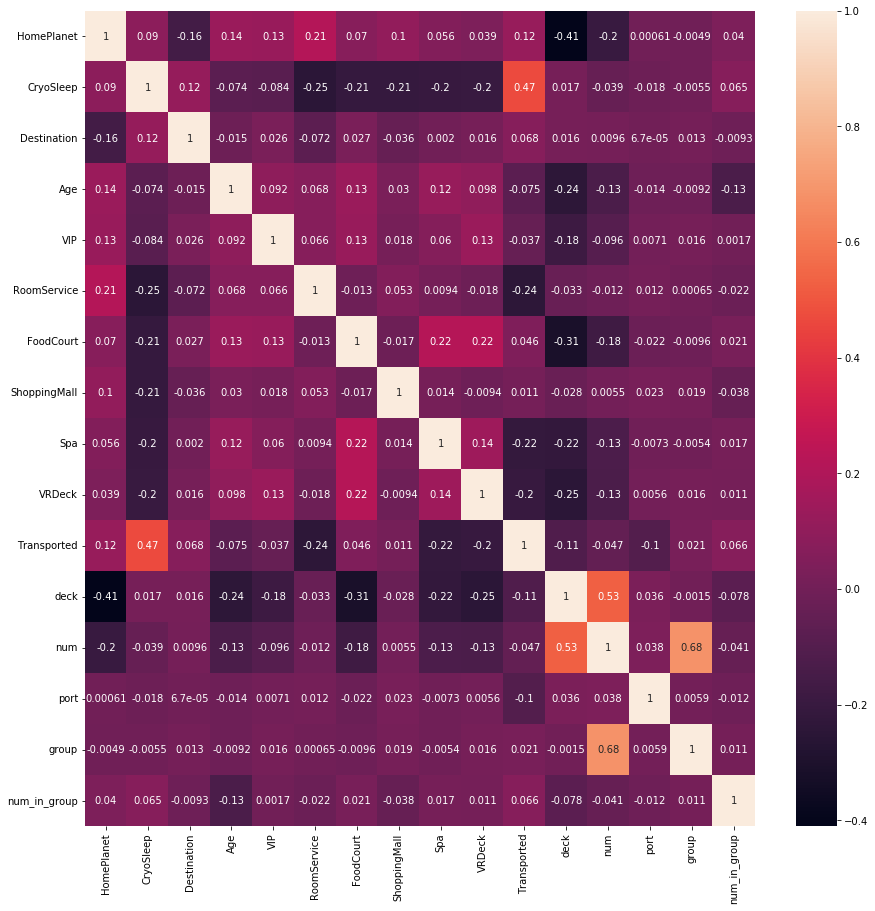

In [ ]:
corr = train_data.corr()
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr, annot=True)

In [ ]:
#now training random forest as it has feature importance

from sklearn.model_selection import train_test_split
X = train_data.drop(['Transported'], axis = 1)
y = train_data['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
#type(np.array(y_train).reshape(-1,1))
y_train

5623    False
5253     True
478      True
1352     True
5344     True
        ...  
5734     True
5191    False
5390    False
860     False
7270    False
Name: Transported, Length: 6519, dtype: bool

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))   #model.score and accuracy_score are same

0.797148114075437

In [ ]:
prediction = model.predict(test_data)
df["Transported"] = prediction
df.to_csv('mycsv.csv', sep = ',', header=['PassengerId', 'Transported'], index=False)

In [ ]:
prediction


array([False, False,  True, ...,  True,  True, False])

In [ ]:
#lets normlaize the values ans check the score.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_tr = scaler.fit_transform(X_train)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
X_test_tr = scaler.transform(X_test)
y_pred = model.predict(X_test)
accuracy_score(y_test, model.predict(X_test)), accuracy_score(y_train, model.predict(X_train))

(0.7989880404783809, 1.0)

In [ ]:
np.shape(np.array(y_test)), np.shape(y_pred)
#np,array(y_test)-y_pred

((2174,), (2174,))

In [ ]:
#import xgboost as xgb
#data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
#xg_clf = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                #max_depth = 5, alpha = 10, n_estimators = 10,use_label_encoder=False)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
#xg_clf.fit(X_train,y_train)
#accuracy_score(y_test, xg_clf.predict(X_test))

In [ ]:
#xg_clf.predict(X_train)

In [ ]:
#cheking for overfitting
#from sklearn.metrics import mean_squared_error
#mean_squared_error(np.array(y_test), y_pred)
# as this is a classification error, there is no point using mean_squared_error

In [ ]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.79907975 0.82515337 0.80521472 0.8006135  0.81441718 0.78527607
 0.82055215 0.78680982 0.79907975 0.79569892]
Mean: 0.8031895243749586
Standard Deviation: 0.012648102593481696


In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
num,0.112
group,0.107
Spa,0.103
RoomService,0.099
Age,0.097
VRDeck,0.093
CryoSleep,0.085
FoodCourt,0.079
ShoppingMall,0.070


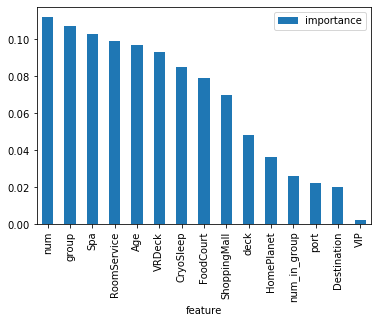

In [ ]:
importances.plot.bar()

In [ ]:
#prediction_xg = xg_clf.predict(test_data)
#df["Transported"] = prediction_xg.astype(bool)
#df.to_csv('mycsv.csv', sep = ',', header=['PassengerId', 'Transported'], index=False)

In [ ]:
#evaluating the model for overfitting.
#https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710 this link has explanation for obb score.

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
pred = cross_val_predict(model, X_train, y_train, cv=3)
confusion_matrix(y_train, pred)
#y_train.sum(), len(y_train), pred.sum(), len(pred)


array([[2691,  542],
       [ 737, 2549]])

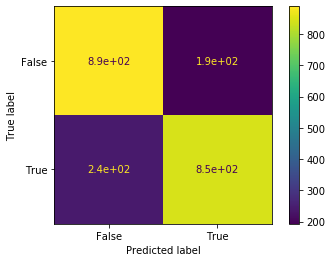

In [ ]:
plot_confusion_matrix(model, X_test, y_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, pred))
print("Recall:",recall_score(y_train, pred))

Precision: 0.8246522161112908
Recall: 0.7757151552038953


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, pred)

0.7994354712247138

Don’t use validation and oob together when evaluating your model. Its like apples and oranges so pick one tune your forest by the increase or decreases based on either oob or validation.

Oob particularly helps when we can’t afford to hold out a valdation set. For example I am working with patient data which has 257 observations. If I were to leave 20% of this data for validation this might cause some of the relationships in my data to be damaged. But given enough data like groceries it’s feasible to work with a subset.

In [ ]:
random_forest = RandomForestClassifier(criterion = "entropy", 
                                       min_samples_leaf = 5, 
                                       min_samples_split = 2,   
                                       n_estimators=400, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train), accuracy_score(y_test, Y_prediction)

(0.9463107838625556, 0.7943882244710212)

In [ ]:
param_grid = { "criterion" : ["gini", "entropy"], 
            "min_samples_leaf" : [1, 5, 10, 25, 50, 70], 
            "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], 
            "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, y_train)


/usr/lib/python3/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


AttributeError: 'GridSearchCV' object has no attribute 'bestpar'

In [ ]:
clf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 400}

In [ ]:
random_forest = RandomForestClassifier(criterion = "entropy", 
                                       min_samples_leaf = 5, 
                                       min_samples_split = 2,   
                                       n_estimators=400, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train), accuracy_score(y_test, Y_prediction)

(0.8834177021015494, 0.7948482060717571)

In [ ]:
prediction = random_forest.predict(test_data)
df["Transported"] = prediction
df.to_csv('mycsv.csv', sep = ',', header=['PassengerId', 'Transported'], index=False)

In [ ]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 9.1 MB/s eta 0:00:00m eta 0:00:010:00:01
--- Logging error ---
Traceback (most recent call last):
  File "/home/linpeng/.local/lib/python3.8/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/home/linpeng/.local/lib/python3.8/site-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/home/linpeng/.local/lib/python3.8/site-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/home/linpeng/.local/lib/python3.8/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/home/linpeng/.local/lib/python3.8/site-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in seg

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
xg_clf = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10,use_label_encoder=False)

xg_clf.fit(X_train,y_train)
accuracy_score(y_test, xg_clf.predict(X_test))

0.7681692732290708

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'learning_rate':[0.1,0.2,0.3],
        'objective':['binary:logistic' , ]
        }

In [ ]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [ ]:
xgb.fit(X_train,y_train)
accuracy_score(y_test, xg_clf.predict(X_test))

[19:36:23] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.7681692732290708

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

In [ ]:

random_search.fit(X_train,y_train)
 

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    9.5s finished


[19:40:14] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fc9a844e040>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           i...
                                           objective='binary:logistic',
                                           predictor='auto', random_state=0, ...),
                   iid='deprecated', n_iter=5, 

In [ ]:
random_search.best_params_

{'subsample': 0.8,
 'min_child_weight': 1,
 'max_depth': 4,
 'gamma': 1,
 'colsample_bytree': 1.0}

In [ ]:
xg_clf = XGBClassifier(objective ='binary:logistic', colsample_bytree = 1.0, learning_rate = 0.1,
                max_depth = 4, alpha = 10, n_estimators = 10,use_label_encoder=False, gamma = 1, subsample = 0.8)

xg_clf.fit(X_train,y_train)
accuracy_score(y_test, xg_clf.predict(X_test))

0.7879484820607175

In [ ]:
prediction = xg_clf.predict(test_data)
df["Transported"] = prediction.astype(bool)
df.to_csv('mycsv.csv', sep = ',', header=['PassengerId', 'Transported'], index=False)

In [ ]:
type(prediction)

numpy.ndarray

array([ True, False,  True, ...,  True,  True,  True])